In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wrangle import wrangle_zillow 

In [2]:
df = wrangle_zillow()

In [3]:
df.head()

,bedroom_cnt,bath_cnt,SqFt,tax_value,year_built,tax_amount,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


In [4]:
#split data

seed = 42

train, valid_test = train_test_split(df, test_size=0.3,
                                     random_state=seed)

valid, test = train_test_split(valid_test, test_size=0.5,
                               random_state=seed)

In [5]:
train.shape

(1466208, 7)

In [6]:
train.head()

,bedroom_cnt,bath_cnt,SqFt,tax_value,year_built,tax_amount,fips
781667,3,2.0,1718,484000,1951,6547.75,6037
1766333,4,2.0,1361,207712,1970,2280.74,6111
192985,2,2.0,2136,762857,1978,8056.38,6059
1465240,3,1.5,956,226704,1962,2399.60,6111
377201,4,2.0,1863,71360,1968,809.02,6111


In [7]:
# fit model
X = train['SqFt']
y = train['tax_value']

In [8]:
model = LinearRegression().fit(train[['SqFt']], train['tax_value'])
predictions = model.predict(train[['SqFt']])
train['yhat'] = predictions
train

,bedroom_cnt,bath_cnt,SqFt,tax_value,year_built,tax_amount,fips,yhat
781667,3,2.0,1718,484000,1951,6547.75,6037,390422.140033
1766333,4,2.0,1361,207712,1970,2280.74,6111,354300.670830
192985,2,2.0,2136,762857,1978,8056.38,6059,432715.624983
1465240,3,1.5,956,226704,1962,2399.60,6111,313322.533498
377201,4,2.0,1863,71360,1968,809.02,6111,405093.325003
...,...,...,...,...,...,...,...,...
266442,3,2.0,1768,270861,1950,3376.60,6059,395481.169333
1453828,3,1.0,1498,477462,1908,5023.30,6111,368162.411112
135736,3,1.0,1000,40948,1951,868.32,6037,317774.479282
689812,3,2.0,1693,325038,1976,3513.84,6111,387892.625383


In [9]:
train['residual'] = train.tax_value - train.yhat
train

,bedroom_cnt,bath_cnt,SqFt,tax_value,year_built,tax_amount,fips,yhat,residual
781667,3,2.0,1718,484000,1951,6547.75,6037,390422.140033,93577.859967
1766333,4,2.0,1361,207712,1970,2280.74,6111,354300.670830,-146588.670830
192985,2,2.0,2136,762857,1978,8056.38,6059,432715.624983,330141.375017
1465240,3,1.5,956,226704,1962,2399.60,6111,313322.533498,-86618.533498
377201,4,2.0,1863,71360,1968,809.02,6111,405093.325003,-333733.325003
...,...,...,...,...,...,...,...,...,...
266442,3,2.0,1768,270861,1950,3376.60,6059,395481.169333,-124620.169333
1453828,3,1.0,1498,477462,1908,5023.30,6111,368162.411112,109299.588888
135736,3,1.0,1000,40948,1951,868.32,6037,317774.479282,-276826.479282
689812,3,2.0,1693,325038,1976,3513.84,6111,387892.625383,-62854.625383


In [13]:
train['baseline_residual'] = train.tax_value - train.baseline

In [14]:
train['baseline'] = train.tax_value.mean()
train.head()

,bedroom_cnt,bath_cnt,SqFt,tax_value,year_built,tax_amount,fips,yhat,residual,baseline,baseline_residual
781667,3,2.0,1718,484000,1951,6547.75,6037,390422.140033,93577.859967,398527.542402,85472.457598
1766333,4,2.0,1361,207712,1970,2280.74,6111,354300.670830,-146588.670830,398527.542402,-190815.542402
192985,2,2.0,2136,762857,1978,8056.38,6059,432715.624983,330141.375017,398527.542402,364329.457598
1465240,3,1.5,956,226704,1962,2399.60,6111,313322.533498,-86618.533498,398527.542402,-171823.542402
377201,4,2.0,1863,71360,1968,809.02,6111,405093.325003,-333733.325003,398527.542402,-327167.542402


Text(0.5, 1.0, 'Baseline Residuals')

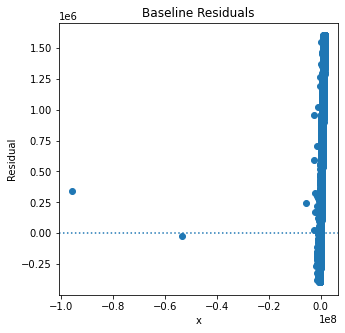

In [19]:
#plot data

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(train.residual, train.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

In [22]:
train['residual^2'] = train.residual**2
train['baseline_residual^2'] = train.baseline_residual**2

train.head()

,bedroom_cnt,bath_cnt,SqFt,tax_value,year_built,tax_amount,fips,yhat,residual,baseline,baseline_residual,residual^2,baseline_residual^2
781667,3,2.0,1718,484000,1951,6547.75,6037,390422.140033,93577.859967,398527.542402,85472.457598,8.756816e+09,7.305541e+09
1766333,4,2.0,1361,207712,1970,2280.74,6111,354300.670830,-146588.670830,398527.542402,-190815.542402,2.148824e+10,3.641057e+10
192985,2,2.0,2136,762857,1978,8056.38,6059,432715.624983,330141.375017,398527.542402,364329.457598,1.089933e+11,1.327360e+11
1465240,3,1.5,956,226704,1962,2399.60,6111,313322.533498,-86618.533498,398527.542402,-171823.542402,7.502770e+09,2.952333e+10
377201,4,2.0,1863,71360,1968,809.02,6111,405093.325003,-333733.325003,398527.542402,-327167.542402,1.113779e+11,1.070386e+11


In [23]:
SSE = train['residual^2'].sum()
SSE_baseline = train['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 122605144498006944.0
SSE Baseline = 144129407074051616.0
